# Mohan M Mohadikar
# 17070122043
# CS-2, 17-21

# Summer Olympics Medal Visualization (1896-2014)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

In [2]:
olympic_detail = pd.read_csv('summer.csv',  )
country_detail = pd.read_csv('dictionary.csv', na_values={'GDP per Capita':0})

The dataset is about Olympics data from Year 1896 to 2012. The dataset was formed by combining two datasets :
1. Dictionary.csv : This has the Country Name, Country Code, GDP per capita and the Population
2. Summer.csv     : This has all the details about the olympics including country code, hosting city, athlete name, sporting      events and the medals won.

The url for the two base datasets is :
1. https://www.kaggle.com/the-guardian/olympic-games#summer.csv 
2. https://www.kaggle.com/the-guardian/olympic-games#dictionary.csv

In [3]:
olympic_detail.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
country_detail.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [5]:
olympics = olympic_detail.merge(country_detail, left_on='Country', right_on='Code', how='inner')

## Attributes/Columns in the **OLYMPICS** dataset: FeatureSet Exploration


1. **Year**       : Categorical Variable. This includes olympic years from 1896 to 2012  
2. **City**       : Categorical Variable. This includes the hosting city for Olympics for every Olympic year                     
3. **Sport**      : Categorical Varibale. This includes name of all the Sports for every Olympic Year                           
4. **Discipline** : Categorical Variable. This includes disciplines/ type of event for every Sport in the Olympic year           
5. **Athlete**    : Categorical Variable. This includes names of athletes taking part in the events for every Sport 
6. **Country**    : Categorical Variable. This includes the country to which the athlete belongs
7. **Code**       : Categorical Variable. This includes the Country Code to which the athlete belongs
8. **Gender**     : Categorical Variable. This specifies the gender of the athlete                                               
9. **Event**      : Categorical Variable. This speicifies the particular event of a discipline the athlete paritcipated in       
10. **Medal**     : Categorical Variable. This includes medal won by an athlete for the particular event
11. **GDP Per Capita** : Numerical Variable. This has the GDP per capita for every country in the world
12. **Population** : Numerical Variable. This has the the population for very country in the world.

In [6]:
olympics

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,HUN,9844686.0,12363.543460
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,HUN,9844686.0,12363.543460
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,HUN,9844686.0,12363.543460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,GUA,16342897.0,3903.478856
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,GRN,106825.0,9212.020352
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,BOT,2262485.0,6360.138220
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,CYP,1165300.0,23242.840070


In [7]:
olympics = olympics.drop(columns=['Country_x'])

In [8]:
olympics = olympics.rename(columns={'Country_y': 'Country'})

In [9]:
olympics.fillna(0,inplace=True)

In [10]:
total_records = olympics.shape[0]
print('Total Number of records in the Dataset : ', total_records)

Total Number of records in the Dataset :  25742


In [11]:
olympics.head(10)

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Country,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Hungary,HUN,9844686.0,12363.54346
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Hungary,HUN,9844686.0,12363.54346
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Hungary,HUN,9844686.0,12363.54346
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Hungary,HUN,9844686.0,12363.54346
5,1896,Athens,Tennis,Tennis,"TAPAVICZA, Momcsillo",Men,Singles,Bronze,Hungary,HUN,9844686.0,12363.54346
6,1900,Paris,Aquatics,Swimming,"HALMAY, Zoltan",Men,1500M Freestyle,Bronze,Hungary,HUN,9844686.0,12363.54346
7,1900,Paris,Aquatics,Swimming,"HALMAY, Zoltan",Men,200M Freestyle,Silver,Hungary,HUN,9844686.0,12363.54346
8,1900,Paris,Aquatics,Swimming,"HALMAY, Zoltan",Men,4000M Freestyle,Silver,Hungary,HUN,9844686.0,12363.54346
9,1900,Paris,Athletics,Athletics,"BAUER, Rudolf",Men,Discus Throw,Gold,Hungary,HUN,9844686.0,12363.54346


In [12]:
olympics.dtypes

Year                int64
City               object
Sport              object
Discipline         object
Athlete            object
Gender             object
Event              object
Medal              object
Country            object
Code               object
Population        float64
GDP per Capita    float64
dtype: object

In [13]:
olympics.groupby('Country')['Medal'].count()

Country
Afghanistan           2
Algeria              15
Argentina           259
Armenia              11
Australia          1189
                   ... 
Venezuela            12
Vietnam               2
Virgin Islands*       1
Zambia                2
Zimbabwe             23
Name: Medal, Length: 129, dtype: int64

In [14]:
olympics.Country.unique()

array(['Hungary', 'Austria', 'Greece', 'United States', 'Germany',
       'United Kingdom', 'France', 'Australia', 'Denmark', 'Switzerland',
       'Netherlands', 'Belgium', 'India', 'Canada', 'Sweden', 'Norway',
       'Spain', 'Italy', 'Cuba', 'South Africa', 'Finland', 'Estonia',
       'New Zealand', 'Brazil', 'Japan', 'Luxembourg', 'Argentina',
       'Poland', 'Portugal', 'Uruguay', 'Haiti', 'Egypt', 'Philippines',
       'Ireland', 'Chile', 'Latvia', 'Mexico', 'Turkey', 'Panama',
       'Jamaica', 'Sri Lanka', 'Korea, South', 'Puerto Rico*', 'Peru',
       'Iran', 'Trinidad and Tobago', 'Venezuela', 'Bulgaria', 'Lebanon',
       'Iceland', 'Pakistan', 'Bahamas', 'Taiwan', 'Ethiopia', 'Morocco',
       'Ghana', 'Iraq', 'Singapore', 'Tunisia', 'Kenya', 'Nigeria',
       'Uganda', 'Cameroon', 'Mongolia', 'Korea, North', 'Colombia',
       'Niger', 'Thailand', 'Bermuda*', 'Tanzania', 'Guyana', 'Zimbabwe',
       'China', "Cote d'Ivoire", 'Zambia', 'Dominican Republic',
       'Alger

# Which country has won Maximum Medals : 


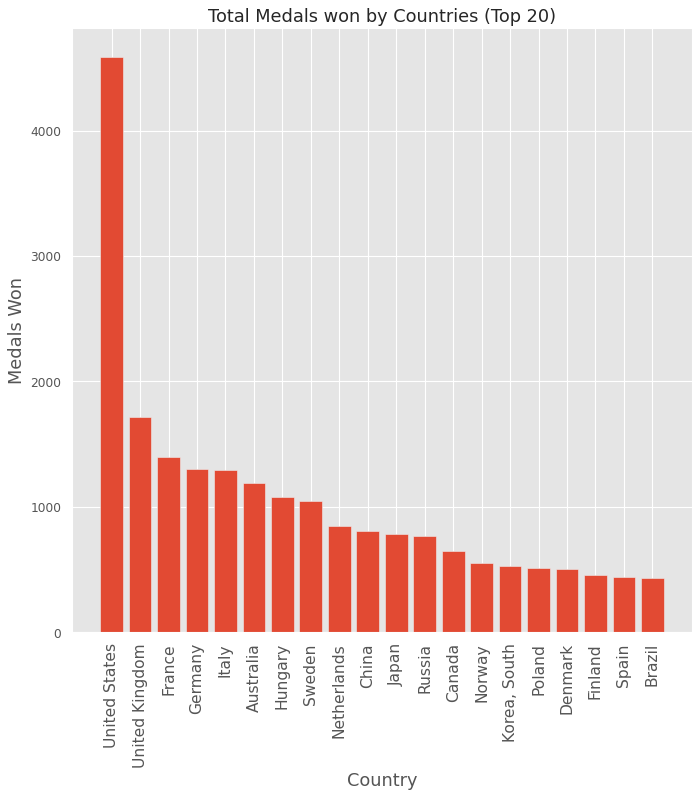

In [15]:
Total_Medals = olympics.groupby(['Country'])['Medal'].count()
pd.DataFrame(Total_Medals)
Total_Medals = Total_Medals.reset_index(drop=False)
Total_Medals = Total_Medals.sort_values(by = ['Medal'], ascending = False)
Total_Medals = Total_Medals.head(20)
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

with plt.style.context('ggplot'):
    plt.bar('Country','Medal',data = Total_Medals)
    plt.xlabel('Country', fontsize = 16)
    plt.ylabel('Medals Won', fontsize = 16)
    plt.title('Total Medals won by Countries (Top 20)', fontsize = 16)
    plt.xticks(Total_Medals['Country'], rotation=90, fontsize = 14)
plt.show()



# Comparing types of Medals won by Countries :

In [16]:
Medal_Types = olympics.groupby(['Country', 'Medal'])['Medal'].count()
Medal_Types = Medal_Types.unstack(level = -1)
pd.DataFrame(Medal_Types)
Medal_Types = Medal_Types.reset_index(drop=False)
Medal_Types = Medal_Types.sort_values(by = ['Gold'], ascending = False)
Medal_Types = Medal_Types.head(20)
Medal_Types

Medal,Country,Bronze,Gold,Silver
121,United States,1098.0,2235.0,1252.0
120,United Kingdom,553.0,546.0,621.0
56,Italy,404.0,476.0,416.0
40,Germany,475.0,452.0,378.0
48,Hungary,351.0,412.0,316.0
37,France,497.0,408.0,491.0
105,Sweden,328.0,349.0,367.0
4,Australia,472.0,312.0,405.0
20,China,221.0,290.0,296.0
93,Russia,291.0,239.0,238.0


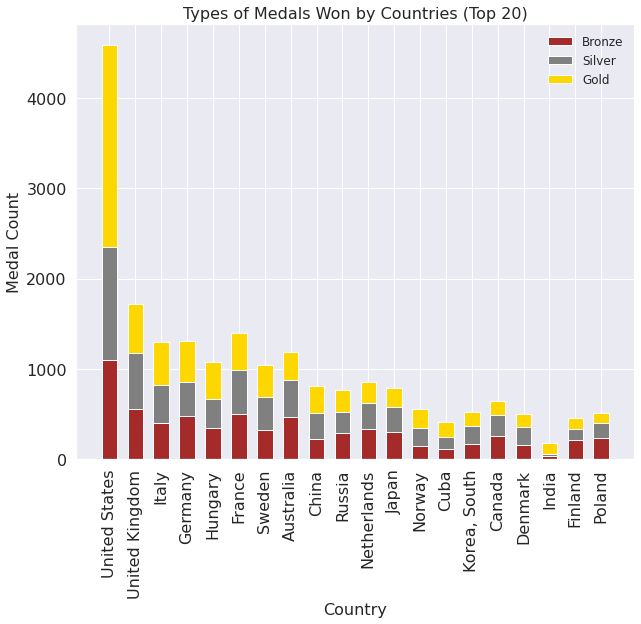

In [17]:
X_axis = Medal_Types['Country']
configs = Medal_Types['Country']
N = len(configs)
ind = np.arange(N)
width = 0.6
fig = plt.figure(figsize=(10,8))

bar_1 = plt.bar(ind, Medal_Types['Bronze'], width, color='brown' )
bar_2 = plt.bar(ind, Medal_Types['Silver'], width, Medal_Types['Bronze'], color='grey')
bar_3 = plt.bar(ind, Medal_Types['Gold'], width, np.array(Medal_Types['Bronze'])+np.array(Medal_Types['Silver']), color='gold')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(ind, X_axis, fontsize=16, rotation=90)
plt.xlabel('Country', fontsize=16)
plt.title('Types of Medals Won by Countries (Top 20)',fontsize=16)
plt.legend((bar_1[0], bar_2[0], bar_3[0]), ('Bronze', 'Silver', 'Gold'), fontsize=12, ncol=1, framealpha=0, fancybox=True)
plt.show()

# Which Sport wins the Maixumum Medals in the Olympics event

In [18]:
Sports_Medals = olympics.groupby(['Sport', 'Medal'])['Medal'].count()
Sports_Medals = Sports_Medals.unstack(level = -1)
pd.DataFrame(Medal_Types)
Sports_Medals = Sports_Medals.reset_index(drop=False)
Sports_Medals = Sports_Medals.sort_values(by = ['Gold'], ascending = False)
Sports_Medals = Sports_Medals.head(20)
Sports_Medals.head(10)

Medal,Sport,Bronze,Gold,Silver
0,Aquatics,1126.0,1260.0,1172.0
2,Athletics,997.0,1023.0,1014.0
28,Rowing,716.0,602.0,701.0
17,Gymnastics,534.0,587.0,538.0
19,Hockey,416.0,468.0,413.0
14,Fencing,438.0,454.0,454.0
15,Football,383.0,415.0,411.0
30,Sailing,300.0,396.0,351.0
31,Shooting,340.0,341.0,343.0
12,Cycling,324.0,319.0,320.0


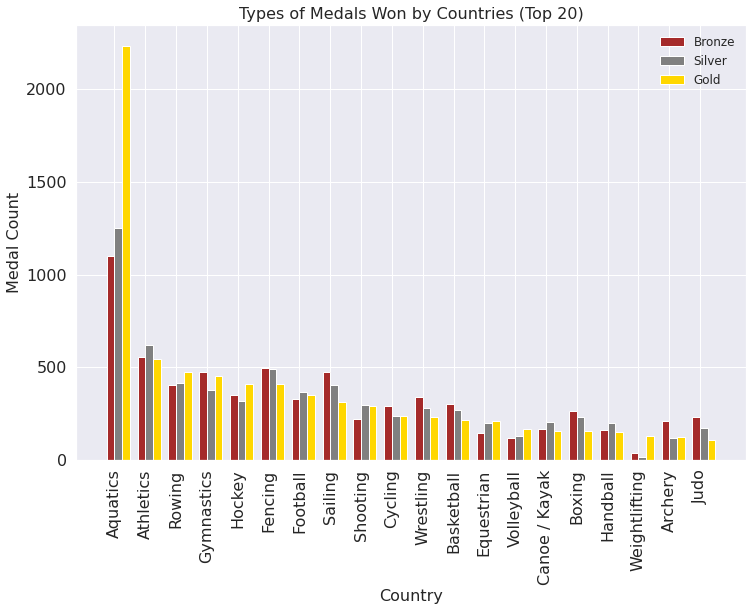

In [19]:
X_axis = Sports_Medals['Sport']
configs = Sports_Medals['Sport']
N = len(configs)
ind = np.arange(N)
width = 0.25
fig = plt.figure(figsize=(12,8))

bar_1 = plt.bar(ind, Medal_Types['Bronze'], width, color='brown' )
bar_2 = plt.bar(ind + width, Medal_Types['Silver'], width, color='grey')
bar_3 = plt.bar(ind + width + width, Medal_Types['Gold'], width, color='gold')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(ind + width/2, X_axis, fontsize=16, rotation=90)
plt.xlabel('Country', fontsize=16)
plt.title('Types of Medals Won by Countries (Top 20)',fontsize=16)
plt.legend((bar_1[0], bar_2[0], bar_3[0]), ('Bronze', 'Silver', 'Gold'), fontsize=12, ncol=1, framealpha=0, fancybox=True)
plt.show()

# Trends of Medal from 1896 to 2012 

In [20]:
Medals_Year = olympics.groupby(['Year', 'Medal'])['Medal'].count().reset_index(name='count')
# Medals_Year = Medals_Year.unstack(level = -1)
pd.DataFrame(Medals_Year)
# Medals_Year = Medals_Year.reset_index(drop=False)
Medals_Year.head(10)

,Year,Medal,count
0,1896,Bronze,38
1,1896,Gold,62
2,1896,Silver,45
3,1900,Bronze,133
4,1900,Gold,160
5,1900,Silver,183
6,1904,Bronze,123
7,1904,Gold,185
8,1904,Silver,154
9,1908,Bronze,204


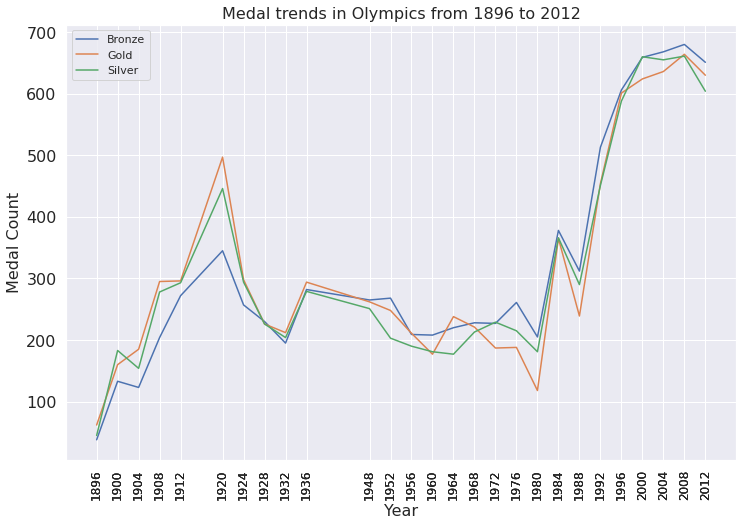

In [21]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x = 'Year', y = 'count', hue = 'Medal', data = Medals_Year)
ax.legend(loc='upper left')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(Medals_Year['Year'], fontsize=12, rotation=90)
plt.xlabel('Year', fontsize=16)
plt.title('Medal trends in Olympics from 1896 to 2012',fontsize=16)
plt.show()

# Which Gender has won more Medals in the Olympics

In [22]:
Gender_Medals = pd.DataFrame(olympics.groupby('Gender')['Medal'].count().reset_index(name = 'Medal_Count'))
Gender_Medals

,Gender,Medal_Count
0,Men,19036
1,Women,6706


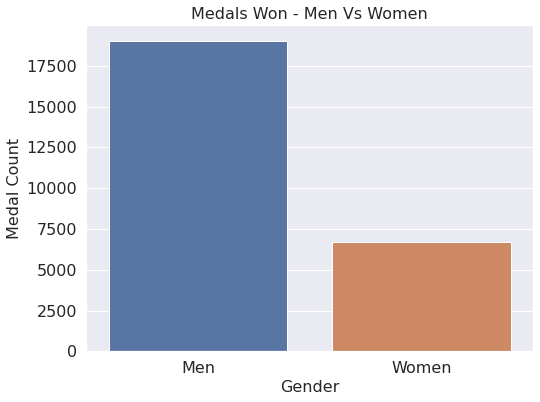

In [23]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x = 'Gender', y = 'Medal_Count', data=Gender_Medals)

plt.xlabel('Gender', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.yticks(fontsize=16)
plt.title('Medals Won - Men Vs Women',fontsize=16)
plt.show()

# To See how many sports did each Olympic Year Have (Trend in Sports)

In [24]:
Sports_Trend= olympics.groupby('Year')['Sport'].count().reset_index(name = 'Sports_Count')
Sports_Trend

,Year,Sports_Count
0,1896,145
1,1900,476
2,1904,462
3,1908,777
4,1912,861
5,1920,1288
6,1924,849
7,1928,682
8,1932,611
9,1936,855


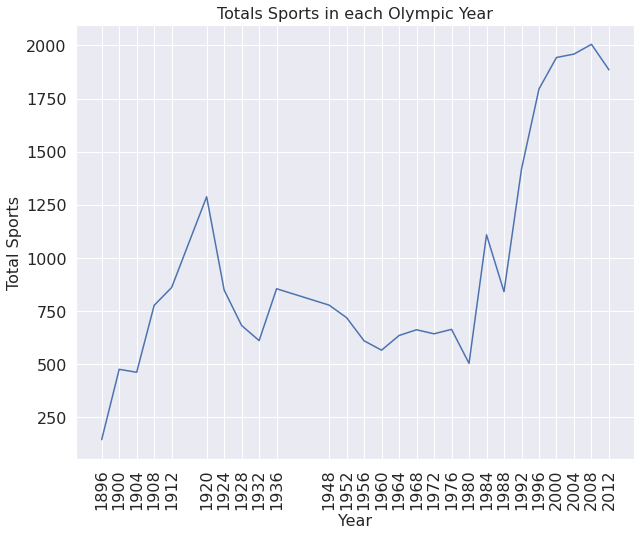

In [25]:
fig = plt.figure(figsize=(10,8))

ax = sns.lineplot(x = 'Year', y = 'Sports_Count', data = Sports_Trend)
plt.xlabel('Year', fontsize=16)
plt.xticks(Sports_Trend['Year'], fontsize=16, rotation = 90)
plt.ylabel('Total Sports', fontsize=16)
plt.yticks(fontsize=16)
plt.title('Totals Sports in each Olympic Year',fontsize=16)
plt.show()

# Corelation between Population and GDP

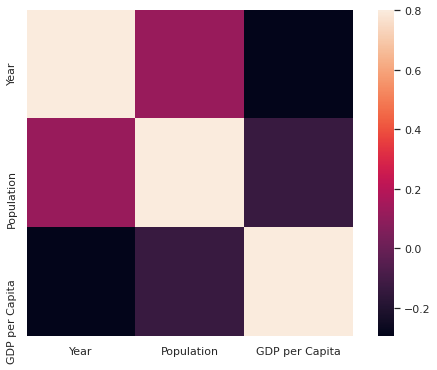

In [26]:
corplot = olympics.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(corplot, vmax = .8, square = True)